<a href="https://colab.research.google.com/github/phamhuyen286/Predicting-Customer-Churn_Credit-Card-Dataset/blob/main/Predict_Customer_Churn_Credit_Card_Dataset_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = '/content/'

In [ ]:
data = pd.read_csv(path+'BankChurners.csv')

In [ ]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [ ]:
data.shape

(10127, 23)

In [ ]:
# as the data suggested to delete two last columns so that it's easy to not making any confuse

data = data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [ ]:
data.shape

(10127, 21)

Our top priority in this business problem is to identify customers who are getting churned. Even if we predict non-churning customers as churned, it won't harm our business. But predicting churning customers as Non-churning will do. So recall (TP/TP+FN) need to be higher.

In [ ]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# check for the missing value

data.isnull().sum(axis=0) # we dont have missing value in itit

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

As part of project requirement, we would like to study all features which most influential factors to customer churn. To do that we will perform EDA

## Univariate Analysis are using for categorical data

In [ ]:
data.Attrition_Flag.unique() # we will use label encoder for this

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
data['Attrition_Flag'].value_counts(normalize =True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

Attrition is set of customer who is churn. we got 16% of customer under Attrition & 84% of them are existing

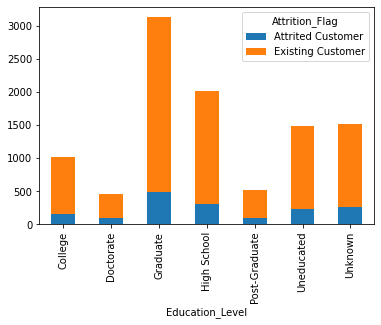

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data.groupby(['Education_Level','Attrition_Flag']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

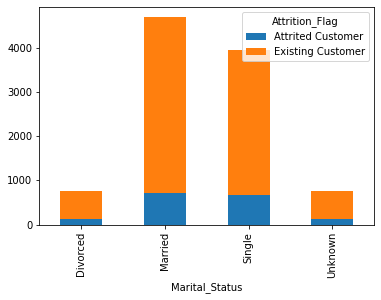

In [ ]:
data.groupby(['Marital_Status','Attrition_Flag']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

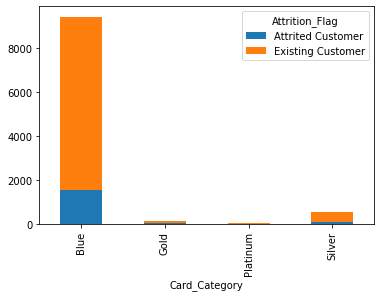

In [ ]:
data.groupby(['Card_Category','Attrition_Flag']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

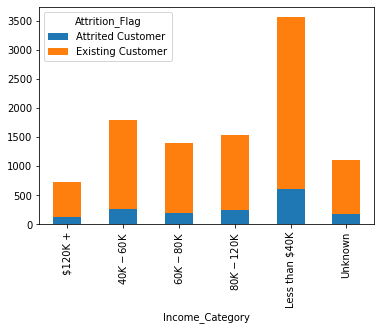

In [ ]:
data.groupby(['Income_Category','Attrition_Flag']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
af_le = LabelEncoder()
data['Attrition_Flag'] = af_le.fit_transform(data['Attrition_Flag'])


In [ ]:
data.Education_Level.unique() #Unknown can be a factor to look into other in the future. however we can check if we have Unknown of education level in the data

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
data['Education_Level'].value_counts(normalize=True)

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

We understand that 6 defined categories for Education Level while most contribution come from Graduate for 31% and then Highschool. However there are number of Unknown also there. Let us check how many unknown in Education level has been associate with the Attrition and also other

In [ ]:
data['Marital_Status'].value_counts(normalize=True)

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

In [ ]:
data['Card_Category'].value_counts(normalize=True)

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

In [ ]:
data['Gender'].value_counts(normalize=True)

F    0.529081
M    0.470919
Name: Gender, dtype: float64

In [ ]:
#Encoding the categorical data

from sklearn.preprocessing import LabelEncoder

gender_le = LabelEncoder()
data['Gender'] = gender_le.fit_transform(data['Gender'])



Edu_le = LabelEncoder()
data['Education_Level'] = Edu_le.fit_transform(data['Education_Level'])

card_le = LabelEncoder()
data['Card_Category'] = card_le.fit_transform(data['Card_Category'])

marital_le = LabelEncoder()
data['Marital_Status'] = marital_le.fit_transform(data['Marital_Status'])

In [ ]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,$60K - $80K,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,Less than $40K,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,$80K - $120K,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,Less than $40K,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,$60K - $80K,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data['Income_Category'].value_counts(normalize=True)

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

In [ ]:
# the same we can also encode the data
income_le = LabelEncoder()
data['Income_Category'] = income_le.fit_transform(data['Income_Category'])


In [ ]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data = data.drop(columns=['CLIENTNUM'])

In [ ]:
data.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
data.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,0.179816,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,0.693039,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Features Important

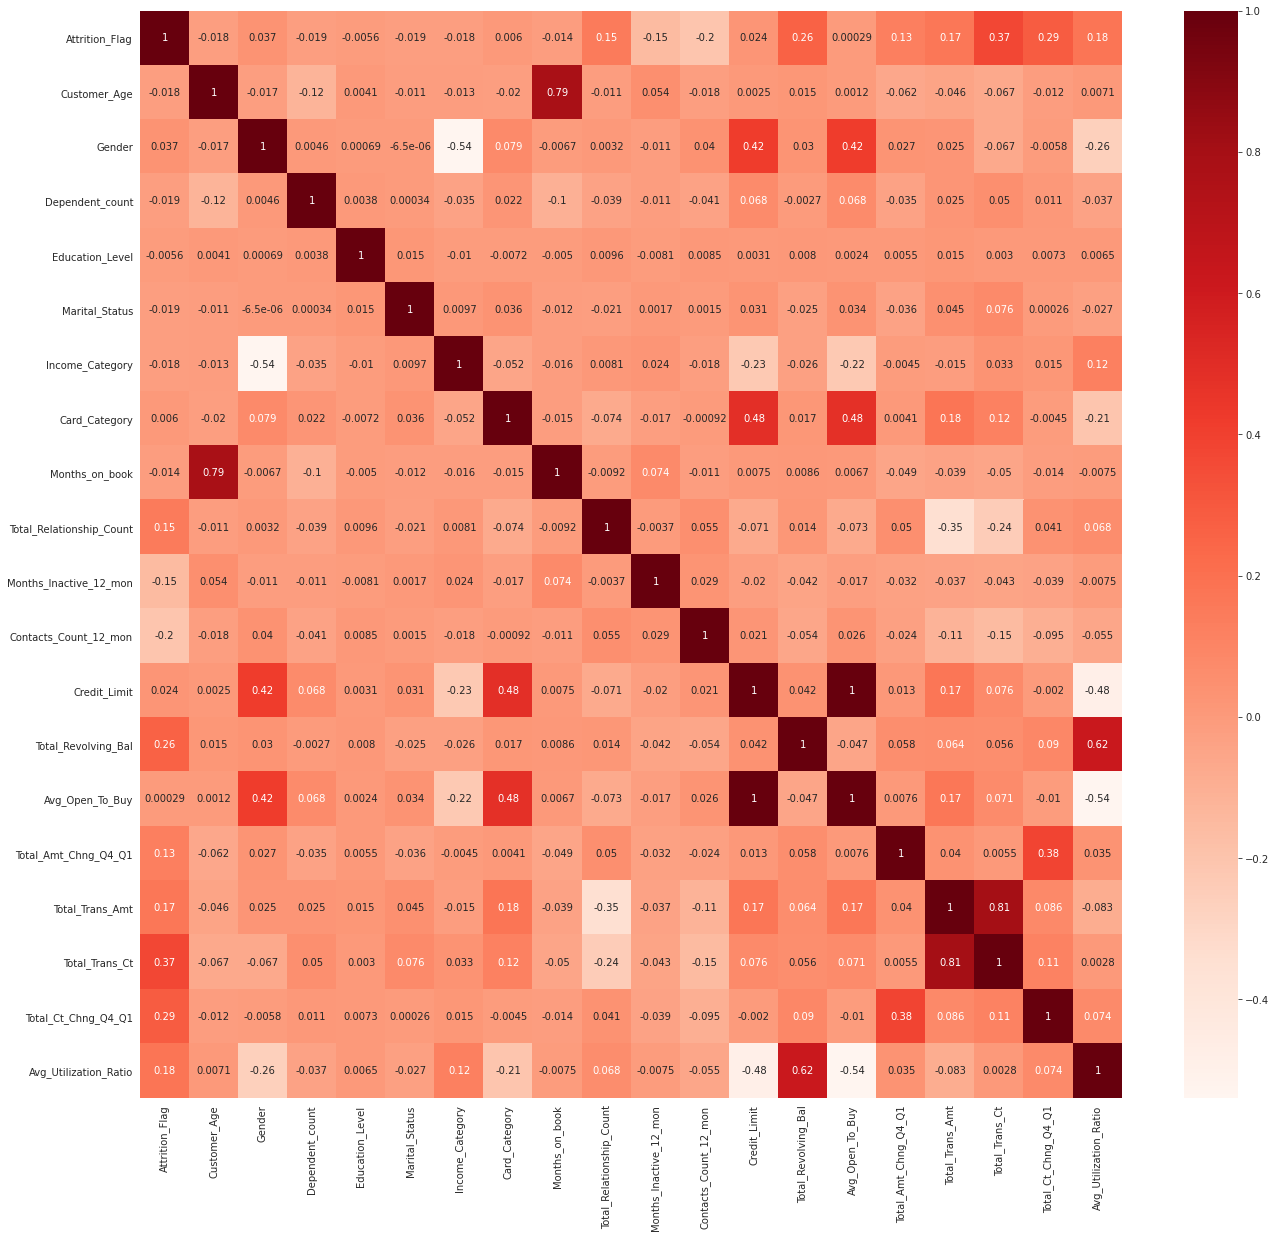

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(22,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Split input & output data

y = data['Attrition_Flag']
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(10127, 1)

In [ ]:
X = data.drop(columns=['Attrition_Flag'])
X.shape

(10127, 19)

In [ ]:
# Split train & test  data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7595, 19), (2532, 19), (7595, 1), (2532, 1))

In [ ]:
#Import libraries for modelling

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
xtree=ExtraTreesClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
from sklearn.decomposition import PCA

In [ ]:
X=X.apply(zscore)

In [ ]:
start_time=time()
model_list=[lr,dt,knn,rf,ada,bag,xtree]
Score=[]
for i in model_list:
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    Score.append(score)
print(pd.DataFrame(zip(model_list,Score),columns=['Model Used','R2-Score']))
end_time=time()
print(round(end_time-start_time,2),'sec')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-pac

                                          Model Used  R2-Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.899309
1  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.933860
2  KNeighborsClassifier(algorithm='auto', leaf_si...  0.897993
3  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.958868
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.962159
5  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.955248
6  (ExtraTreeClassifier(ccp_alpha=0.0, class_weig...  0.937150
4.11 sec


Find out F1, accuracy and Recall for RandomForest

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9588680487002303

In [ ]:
train_pred = rf.predict(x_train)

test_pred = rf.predict(x_test)

# Use score method to get accuracy of model
score = rf.score(x_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = rf.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 100.0 %
Test F1 Score = 95.89 %


[[ 426   97]
 [  28 2488]]


Text(0.5, 1.0, 'Test F1 Score:95.89%')

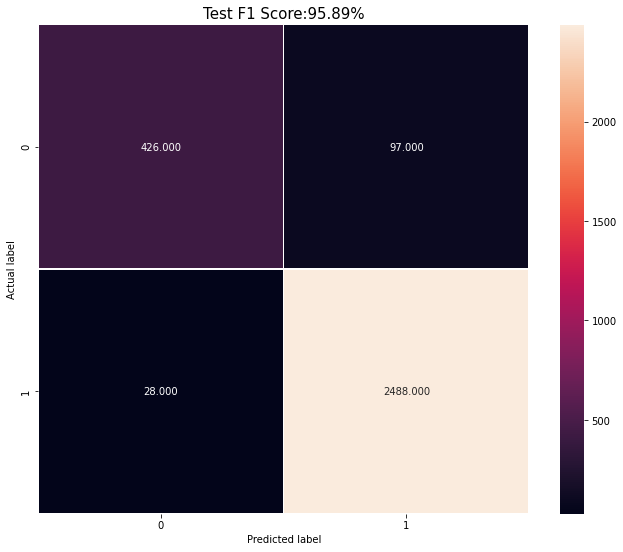

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import classification_report

print('*********************  Training Data Report  **********')
print(classification_report(y_train, train_pred))

print('***********************  Test Data Report  **********')
print(classification_report(y_test, test_pred))


*********************  Training Data Report  **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1104
           1       1.00      1.00      1.00      5984

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

***********************  Test Data Report  **********
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       523
           1       0.96      0.99      0.98      2516

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

